# Approach

We will apply TF-IDF based random forest, Multi Layer Perceptron (MLP) and Long Short Term Memory (LSTM) with various hyperparameters to determine the best performing model.
The tf-idf is a simple model that keeps the frequency of words occurrence. In our experiment, we restrict our feature space to 10000 words that occur the most frequently. Random forest, a ensemble tree classifier, utilizes these features and make subsequent predictions. 

On the other hand, MLP and LSTM are neural network models that are able to capture information from sequences of words.In a MLP, each input will be fed forward sequentially, through a number of hidden states, and
compute a probability output vector. 


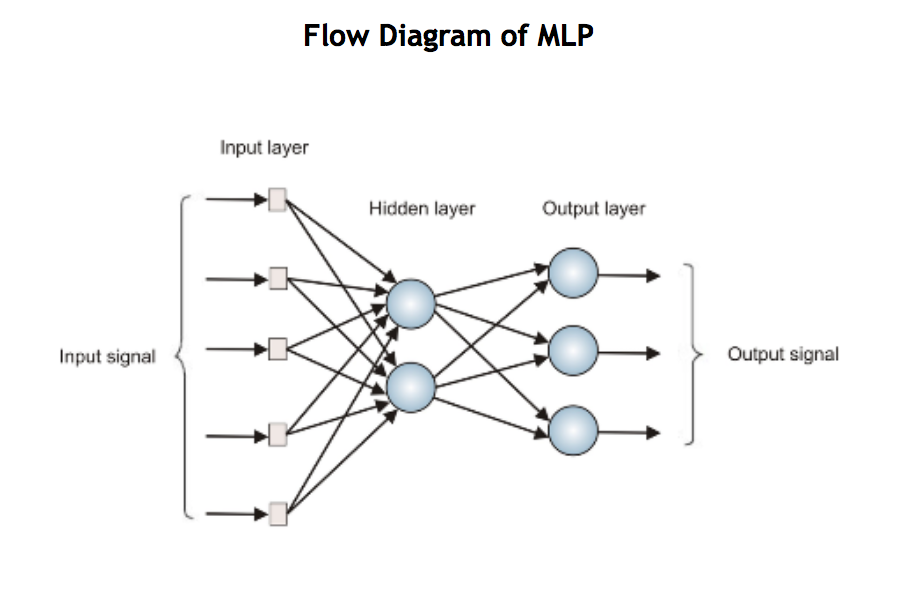

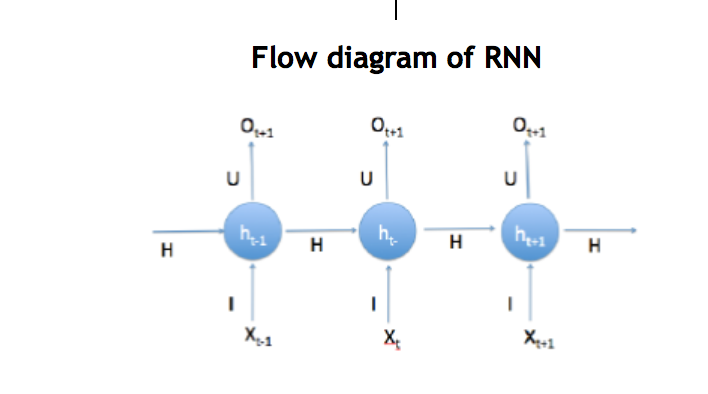

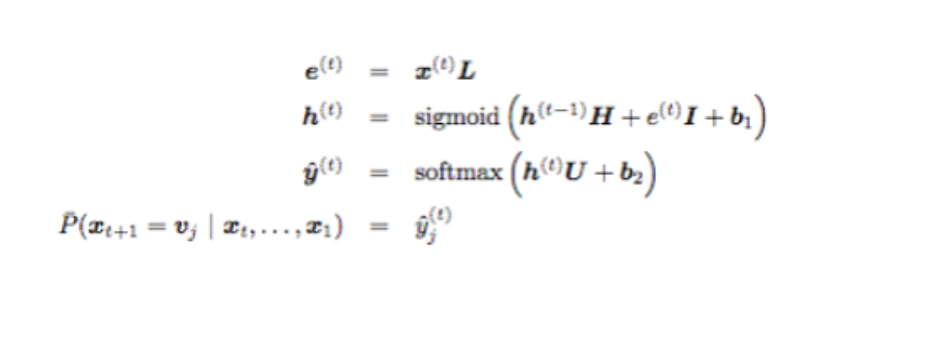

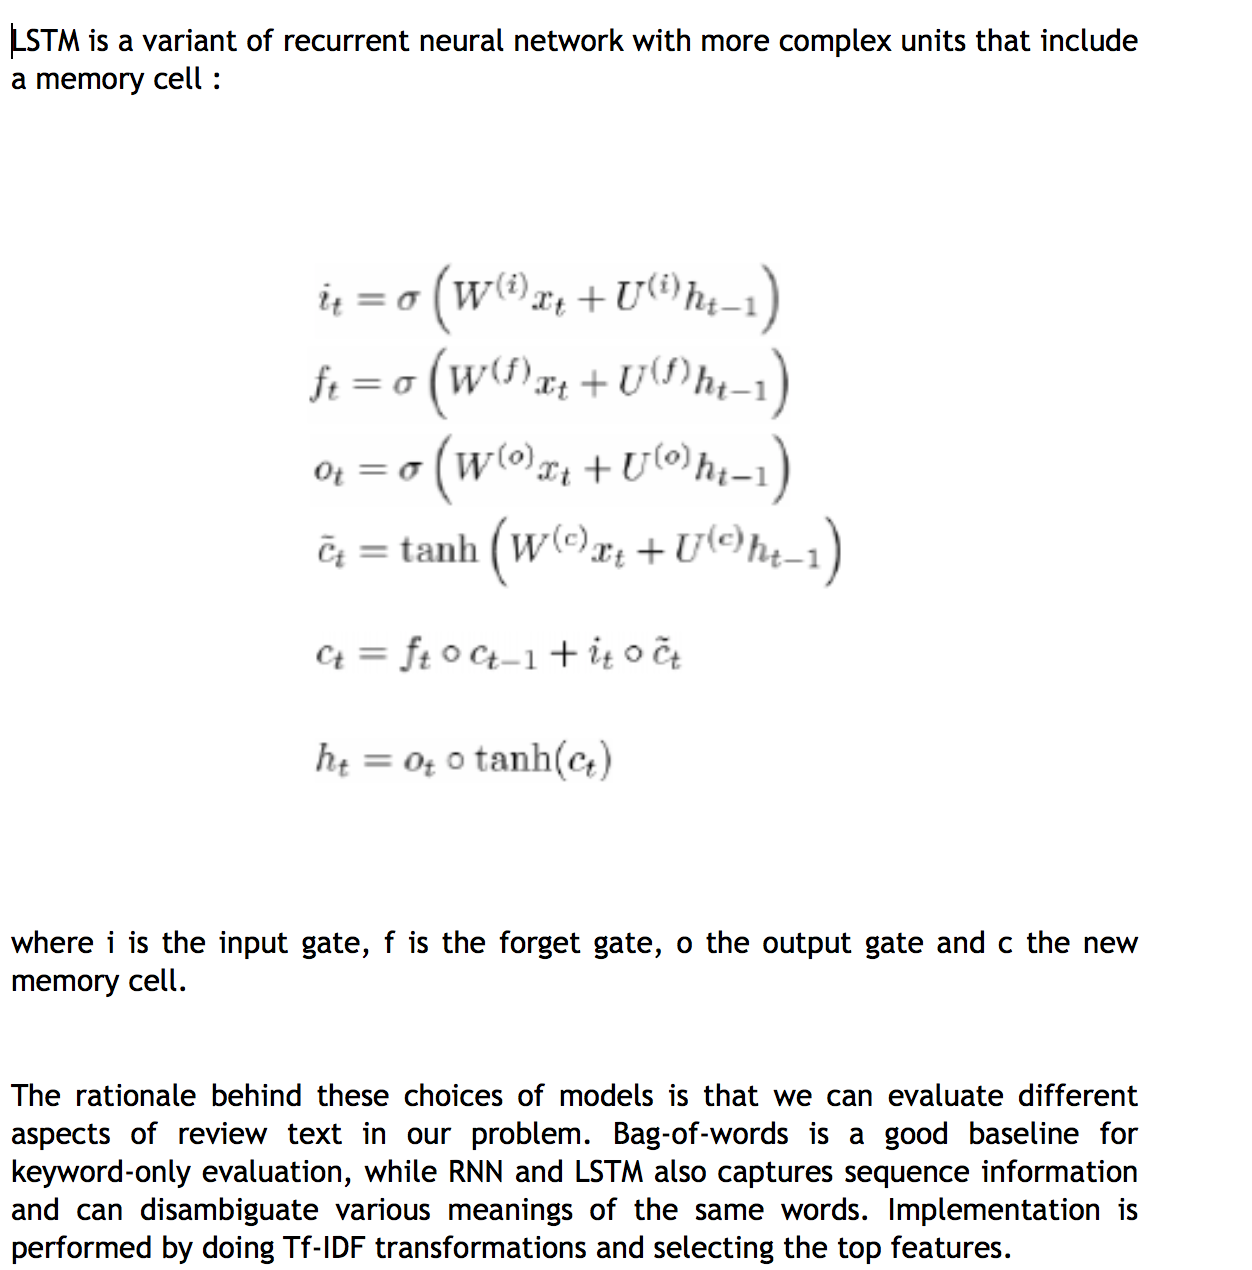

# Implementation  


# Data and setup

This project uses Amazon review data collected by Stanford SNAP, publicly available at:
https://snap.stanford.edu/data/web-Amazon.html
The data comes from reviews for 24 product categories, where users provide comments or feedback and specifically, the reviews data of cellphones. 
Each review comes with a helpful rating [x, y], directly relatable to the annotation “x out of y people found this review helpful” on Amazon website. Note that there might be many more who read  the review but did not vote. In many cases, reviews have never been voted and have helpful rating [0,0].
Previous projects have focused on using helpfulness ratio, i.e. x=y, in making predictions and analyses.

There are several problems in this approach:
1. Many reviews ( >70%) are never rated and cannot be accounted for without correction. A
lot work simply disregards this bulk of the population in their analyses.
2. Viewing each [x, y] pair as binomial (y, pi), variance of the helpfulness ratio is relatively
high with small y.
3. Preferential attachment is likely to be at force here for the helpfulness rating. Preferential attachment is a result of the richer-gets-richer effects, where reviews that happen to have already possessed some upvotes are much likelier to gain more upvotes faster than the otherwise.
Since our focus is to discover any hints in review text that relates to helpfulness, we want to restrict measuring the effect of preferential attachment. 

As a result, we decide to cast the problem as a binary classification problem rather than a regression problem. To set up binary labels for the dataset, we first perform correction on the data by adding one upvote and one downvote to each observation (i.e. 1 to x and 2 to y). Hence, all cases of [0,0] will now have a helpfulness ratio of 0.5. We then label reviews with ratio >0.5 as “helpful” and “unhelpful” otherwise.
We then perform NLP and deep learning on the review text and evaluate the model using cross entropy loss. The score metrics that was used is  Accuracy:
Accuracy = (truePositives + trueNegatives)=totalEntries
We expect the model to explain a proportion of variances in the ”helpful” and ”unhelpful” text. 

The neural network models are expected to perform better than the bag-of-words baseline since LSTM captures both keywords and sentence structure, where readability is assumed to play a role in indicating helpfulness. But because of various biases, including the effect of preferential attachment, we expect none of the models to have a very high accuracy (>90%).


# Technology stack and why it was chosen

Deep Learning AMI instance running on Ubuntu Linux. 
This is a pre-configured GPU cluster having Theano and Tensorflow libraries pre-installed so that the focus of the project would be trying out conventional Machine Learning models like Random Forest and Deep Learning models like RNN, Long Short Term Memory to select the optimal approach rather than spend significant time on setting up the machine with appropriate configuration.

Jupyter notebook was configured on this instance and the data was uploaded to this instance using a SCP tool 

Once the data was uploaded it was pickled to save time and resources if re-import and re-run was required.


# Goal 

Predict Helpfulness of Amazon Customer Reviews based on the Review data and make informed recommendations to the users


# Modeling Choices 

Text Analytics requires word to vector kind of transformations and is an evolving research area. There are many choices available to get started but since the end goal was provided better recommendations hence the algorithms which have proven to be better choice for text analytics were picked – 

Long Short Term Memory Model - Long short-term memory (LSTM) is a deep learning system that avoids the vanishing gradient problem. LSTM is normally augmented by recurrent gates called "forget" gates.  LSTM prevents backpropagated errors from vanishing or exploding. Instead errors can flow backwards through unlimited numbers of virtual layers unfolded in space. That is, LSTM can learn tasks that require memories of events that happened thousands or even millions of discrete time steps earlier. 


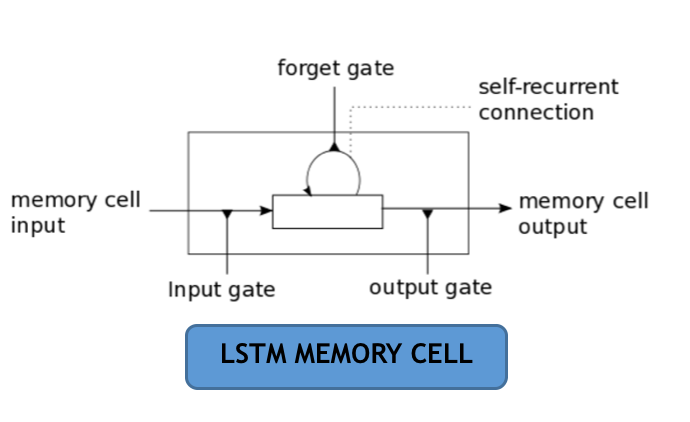

# How does LSTM work

In a traditional recurrent neural network, during the gradient back-propagation phase, the gradient signal can end up being multiplied a large number of times (as many as the number of timesteps) by the weight matrix associated with the connections between the neurons of the recurrent hidden layer. This means that, the magnitude of weights in the transition matrix can have a strong impact on the learning process.
If the weights in this matrix are small (or, more formally, if the leading eigenvalue of the weight matrix is smaller than 1.0), it can lead to a situation called vanishing gradients where the gradient signal gets so small that learning either becomes very slow or stops working altogether. It can also make more difficult the task of learning long-term dependencies in the data. Conversely, if the weights in this matrix are large (or, again, more formally, if the leading eigenvalue of the weight matrix is larger than 1.0), it can lead to a situation where the gradient signal is so large that it can cause learning to diverge. This is often referred to as exploding gradients.
These issues are the main motivation behind the LSTM model which introduces a new structure called a memory cell (see Figure above). A memory cell is composed of four main elements: an input gate, a neuron with a self-recurrent connection (a connection to itself), a forget gate and an output gate. The self-recurrent connection has a weight of 1.0 and ensures that, barring any outside interference, the state of a memory cell can remain constant from one timestep to another. The gates serve to modulate the interactions between the memory cell itself and its environment. The input gate can allow incoming signal to alter the state of the memory cell or block it. On the other hand, the output gate can allow the state of the memory cell to have an effect on other neurons or prevent it. Finally, the forget gate can modulate the memory cell’s self-recurrent connection, allowing the cell to remember or forget its previous state, as needed.


# Models 

Tf-IDf based word vector in Random Forest 

Accuracy  on Test Data = 75%

MLP – Accuracy on Test Data = 76 %

LSTM – Accuracy on Test Data = 77 %



# Recommendation Engine Logic 

For Recommendation we will use the logic of Matrix Factorization via Singular Value Decomposition
Matrix factorization is the breaking down of one matrix into a product of multiple matrices. It’s extremely well studied in mathematics, and it’s highly useful. There are many different ways to factor matrices, but singular value decomposition is particularly useful for making recommendations.
So what is singular value decomposition (SVD)?
At a high level, SVD is an algorithm that decomposes a matrix RR into the best lower rank (i.e. smaller/simpler) approximation of the original matrix RR
Mathematically, it decomposes RR into two unitary matrices and a diagonal matrix:
R=UΣVT
Where

R is user ratings matrix,
U is the user “features” matrix,
Σ is the diagonal matrix of singular values (essentially weights), and
VT is the item “features” matrix.
U and VTare orthogonal, and represent different things.
U represents how much users “like” each feature and VT represents how relevant each feature is to each item.
To get the lower rank approximation, we take these matrices and keep only the top kk features, which we think of as the k most important underlying taste and preference vectors.


# Validation of recommendations 

Like any other recommendation engine it is hard to test the recommendations from a customer’s perspective unless it is being done in real time and the conversions are closely tracked.
That would perhaps be the best way to also tweak the weights that have been applied to the predicted_helpful, review_helpful  and overall variables.

Performing this exercise was beyond the scope of this project and can be done separately as another project altogether.

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##read csv file
df_reviews = pd.read_csv('cellphone2.csv')

In [3]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
reviewerID        100000 non-null object
asin              100000 non-null object
reviewerName      99764 non-null object
helpful           100000 non-null object
reviewText        99968 non-null object
overall           100000 non-null float64
summary           99998 non-null object
unixReviewTime    100000 non-null int64
reviewTime        100000 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [4]:
df_reviews.head(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AEXQJY9OAI7FT,B001KQFGTI,frances fernandez,"[0, 0]",This case lives up to its' description. Once ...,3.0,Durable and clean design!,1346284800,"08 30, 2012"
1,A1LZTUWT0ES437,B001KQFGTI,"Francis Paul R. Calo ""Code9Pickle""","[2, 2]",[...]Anyway before I got this I was using a pe...,3.0,It was ok!,1259625600,"12 1, 2009"
2,A3CZM7OLRS7IDZ,B001KQFGTI,"Frank Jackson ""capt frank""","[0, 0]",It's everything it was advertised to be!Have d...,5.0,My defender,1361059200,"02 17, 2013"
3,A3T1AT9QFTYEWA,B001KQFGTI,"Frank L. Gallagher ""frankieg""","[0, 0]",as mentioned before the belt clip is VERY iffy...,4.0,darn good case,1253664000,"09 23, 2009"


In [5]:
#find out float type values in reviewtext
df_reviews[df_reviews.reviewText.map(type) == float]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
6189,AA7Y8KYXR78AQ,B001MRZY3S,Tucker Cox,"[10, 12]",NaN,2.0,Too many problems!,1288915200,"11 5, 2010"
9670,A2F0Z8RKLLNTB5,B001OD2OAQ,Elkue,"[0, 0]",NaN,4.0,"Amazing phone, trackball stopped working.",1264118400,"01 22, 2010"
13835,A1EDPYP591LG1,B001PR21A4,"Leonard Martin ""Cioplex""","[2, 2]",NaN,4.0,"Great business phone, needs more internet muscle",1259798400,"12 3, 2009"
15022,A1QECYQ0B0PZWN,B001QHY2V4,David F. Kyte,"[12, 14]",NaN,5.0,Great for Drawing and Painting Apps,1261785600,"12 26, 2009"
22178,A1E3T4V1N3E9H8,B001TJ9MAU,"Michael Denney ""The 'PC Doctor'""","[0, 1]",NaN,1.0,See How One Good Review Can Spoil the Truth?,1300060800,"03 14, 2011"
34257,ASQ7ECXSKRP94,B001YSI04A,"Michael Soh ""scuba_mike""","[18, 21]",NaN,3.0,Decent headphones; iPhone compatible,1256947200,"10 31, 2009"
34276,A1K5V0WVIZ3WU4,B001YSI04A,Resident2007,"[0, 0]",NaN,5.0,"Great at first, but quit working, I bought ano...",1277683200,"06 28, 2010"
38239,A18MB9BZRBY2R0,B0024NL6V8,R. Kraemer,"[3, 5]",NaN,1.0,Worst phone I have ever owned,1274400000,"05 21, 2010"
40440,A1XCTYGSM3QK2B,B00264WXI0,"Seth Goldstein ""SethGoldstein.me""","[1, 7]",NaN,1.0,Total garbage. What a disappointment,1249430400,"08 5, 2009"
41674,A2ZJEMNIYU6WI7,B0026NO5DW,Sean Hackbarth,"[1, 5]",NaN,4.0,Protecting My Precious,1246060800,"06 27, 2009"


In [6]:
df_reviews.count()

reviewerID        100000
asin              100000
reviewerName       99764
helpful           100000
reviewText         99968
overall           100000
summary            99998
unixReviewTime    100000
reviewTime        100000
dtype: int64

In [7]:
#drop values in reviewtext which type of Nan (float)
df_reviews = df_reviews.dropna(subset=['reviewText'])

In [8]:
df_reviews.count() ## some records are dropped due to being na

reviewerID        99968
asin              99968
reviewerName      99732
helpful           99968
reviewText        99968
overall           99968
summary           99966
unixReviewTime    99968
reviewTime        99968
dtype: int64

In [9]:
# These need to be installed using -> sudo pip install textblob 
# sudo pip install wordcloud
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [10]:
import nltk

In [11]:
# generate mask to elimate rows containing text and sentence length equal to zero
df_reviews['word_length'] = df_reviews['reviewText'].apply(lambda x: float(len(TextBlob(x).words)))
df_reviews['sentence_length'] = df_reviews['reviewText'].apply(lambda x: float(len(TextBlob(x).sentences)))
mask = ((df_reviews['word_length'] > 0) & (df_reviews['sentence_length'] > 0))
df_reviews = df_reviews[mask]

In [12]:
df_reviews.count()

reviewerID         99968
asin               99968
reviewerName       99732
helpful            99968
reviewText         99968
overall            99968
summary            99966
unixReviewTime     99968
reviewTime         99968
word_length        99968
sentence_length    99968
dtype: int64

In [13]:
#Write a basic function to extract helpful_votes and overall votes and increment helpful by 1 and overall by 2 
##so that we do not ignore the reviews which are marked [0,0]
def creating_basic_features():
    df_reviews['helpful_votes'] = df_reviews['helpful'].apply(lambda x: x[1]).apply(pd.to_numeric)+1
    df_reviews['overall_votes'] = df_reviews['helpful'].apply(lambda x: x[-2]).apply(pd.to_numeric)+2

In [14]:
#Call the function 
creating_basic_features()

In [15]:
##validate the increment
df_reviews.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes
0,AEXQJY9OAI7FT,B001KQFGTI,frances fernandez,"[0, 0]",This case lives up to its' description. Once ...,3.0,Durable and clean design!,1346284800,"08 30, 2012",112.0,5.0,1,2
1,A1LZTUWT0ES437,B001KQFGTI,"Francis Paul R. Calo ""Code9Pickle""","[2, 2]",[...]Anyway before I got this I was using a pe...,3.0,It was ok!,1259625600,"12 1, 2009",174.0,13.0,3,4
2,A3CZM7OLRS7IDZ,B001KQFGTI,"Frank Jackson ""capt frank""","[0, 0]",It's everything it was advertised to be!Have d...,5.0,My defender,1361059200,"02 17, 2013",21.0,1.0,1,2
3,A3T1AT9QFTYEWA,B001KQFGTI,"Frank L. Gallagher ""frankieg""","[0, 0]",as mentioned before the belt clip is VERY iffy...,4.0,darn good case,1253664000,"09 23, 2009",72.0,5.0,1,2
4,AMEVQ5HV7COAE,B001KQFGTI,"Frank Littleton ""big man""","[0, 0]",If you own an I-Phone I will purchase on of th...,5.0,excellent purchase,1269302400,"03 23, 2010",19.0,1.0,1,2


In [16]:
#We now calculate helpfulness ratio as helpful_votes/overall_votes
#Now create a label of "helpful" or "not_helpful" (0,1)  by labelling  reviews having helpfulness ratio >0.5 as helpful
## and rest as not_helpful

df_reviews['percent_helpful'] = np.nan_to_num(100*(df_reviews['helpful_votes']/df_reviews['overall_votes']))
df_reviews['review_helpful'] = np.where((df_reviews['percent_helpful'] > 50), 0, 1)

In [17]:
df_reviews.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful
0,AEXQJY9OAI7FT,B001KQFGTI,frances fernandez,"[0, 0]",This case lives up to its' description. Once ...,3.0,Durable and clean design!,1346284800,"08 30, 2012",112.0,5.0,1,2,50.0,1
1,A1LZTUWT0ES437,B001KQFGTI,"Francis Paul R. Calo ""Code9Pickle""","[2, 2]",[...]Anyway before I got this I was using a pe...,3.0,It was ok!,1259625600,"12 1, 2009",174.0,13.0,3,4,75.0,0
2,A3CZM7OLRS7IDZ,B001KQFGTI,"Frank Jackson ""capt frank""","[0, 0]",It's everything it was advertised to be!Have d...,5.0,My defender,1361059200,"02 17, 2013",21.0,1.0,1,2,50.0,1


In [18]:
#Use only those reviews which are not null 
data = df_reviews[df_reviews['reviewText'].isnull()==False]

In [19]:
data.count()

reviewerID         99968
asin               99968
reviewerName       99732
helpful            99968
reviewText         99968
overall            99968
summary            99966
unixReviewTime     99968
reviewTime         99968
word_length        99968
sentence_length    99968
helpful_votes      99968
overall_votes      99968
percent_helpful    99968
review_helpful     99968
dtype: int64

In [20]:
data.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful
0,AEXQJY9OAI7FT,B001KQFGTI,frances fernandez,"[0, 0]",This case lives up to its' description. Once ...,3.0,Durable and clean design!,1346284800,"08 30, 2012",112.0,5.0,1,2,50.0,1
1,A1LZTUWT0ES437,B001KQFGTI,"Francis Paul R. Calo ""Code9Pickle""","[2, 2]",[...]Anyway before I got this I was using a pe...,3.0,It was ok!,1259625600,"12 1, 2009",174.0,13.0,3,4,75.0,0
2,A3CZM7OLRS7IDZ,B001KQFGTI,"Frank Jackson ""capt frank""","[0, 0]",It's everything it was advertised to be!Have d...,5.0,My defender,1361059200,"02 17, 2013",21.0,1.0,1,2,50.0,1


In [21]:
#Import train_test_split function from sklearn.model_selection library 
from sklearn.model_selection import train_test_split

In [22]:
#In any modeling exercise we split our entire data into train and test partitions to avoid overfitting
train, test = train_test_split(data, test_size = 0.2)

In [23]:
train.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful
5681,AMDRC7DPFOVAF,B001MJ0ECM,A. Singer,"[0, 0]",Great stereo headset! Connects easily with my...,5.0,Love this headset!,1359417600,"01 29, 2013",60.0,6.0,1,2,50.0,1
75649,A29XNVZYXCWMOR,B002HQUJPG,Emily,"[0, 0]",I've had this stylus for less than a month and...,2.0,Doesn't last long,1339545600,"06 13, 2012",77.0,5.0,1,2,50.0,1
26091,A21QSCJMLCHPE8,B001UCELX4,LaShonda Steward,"[0, 0]","Came exactly as described, easy to fit on my e...",5.0,Great Purchase,1385683200,"11 29, 2013",39.0,2.0,1,2,50.0,1


In [24]:
#Import all the required libraries for text processing and building Machine Learning Models

from bs4 import BeautifulSoup

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
#In the below function if we need to set remove_stopwords=True we must have all corpora installed from nltk library
# The way to do that is -> login to Deep Learning AMI  -> hit python -> import nltk  -> nltk.downlaod() -> d (for download)
## say all-corpora in download and it will be done


#Here we have intentionally kept remove_stopwords=True  as we have seen the words like->  not, by,of, for carry weightage to 
#imparting meaning to a text review. Although it makes our model computationally expensive yet we see better  accuracy

In [26]:
# Remove the non Letters
# Convert everything to lower case
# Optionally we can remove stopwords and check how the accuracy is altered
# Stem the words

def review_to_wordlist( review, remove_stopwords=False):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [27]:
# Apply Preprocessing and create train and test dataset which will be used as the actual input to Machine Learning 
# Algorithms

clean_train_reviews = []
for review in train['reviewText']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))

/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [28]:
clean_test_reviews = []
for review in test['reviewText']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

In [29]:
##TFidf transformation

vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)


train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [30]:
##Select Best Features
##We only select the best features for our prediction

fselect = SelectKBest(chi2 , k=10000)
train_features = fselect.fit_transform(train_features, train["review_helpful"])
test_features = fselect.transform(test_features)

In [31]:
#Build Model using RF

model3 = RandomForestClassifier()
model3.fit( train_features, train["review_helpful"] )




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [32]:
#Make Predictions 

pred_3 = model3.predict(test_features.toarray())

In [33]:
type(pred_3)

numpy.ndarray

In [34]:
##Model Evaluation 

print(classification_report(test['review_helpful'], pred_3, target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.38      0.13      0.19      4558
          1       0.78      0.94      0.85     15436

avg / total       0.69      0.75      0.70     19994



In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test['review_helpful'], pred_3)

In [36]:
cnf_matrix

array([[  589,  3969],
       [  948, 14488]])

In [37]:
print('Prediction Accuracy: ', accuracy_score(test['review_helpful'], pred_3))

('Prediction Accuracy: ', 0.75407622286686005)


In [38]:
# Start building Deep Learning models from here 
# A Multilayer Perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data 
# onto a set of appropriate outputs. An MLP consists of multiple layers of nodes in a directed graph, 
# with each layer fully connected to the next one. Except for the input nodes, each node is a neuron 
# (or processing element) with a nonlinear activation function 

#They can be usefull but are not the best deep models to use with unstructured data as text.


from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [39]:
batch_size = 32
##nb_classes = 5

nb_classes = 2

In [40]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 10000, ngram_range = ( 1, 4),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [41]:
X_train = train_features.toarray()
X_test = test_features.toarray()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train['review_helpful']-1)
y_test = np.array(test['review_helpful']-1)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)


# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]

('X_train shape:', (79974, 10000))
('X_test shape:', (19994, 10000))
('Y_train shape:', (79974, 2))
('Y_test shape:', (19994, 2))


In [42]:
# Here's a Deep MLP 
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu')) ## Rectified Linear Unit
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [43]:
# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print("Training...")
model.fit(X_train, Y_train, nb_epoch=5, batch_size=16, validation_split=0.1)

Training...
Train on 71976 samples, validate on 7998 samples
Epoch 1/5
71976/71976 [==============================] - 34s - loss: 0.5262 - acc: 0.7754 - val_loss: 0.5187 - val_acc: 0.7771
Epoch 2/5
71976/71976 [==============================] - 31s - loss: 0.5209 - acc: 0.7782 - val_loss: 0.5190 - val_acc: 0.7791
Epoch 3/5
71976/71976 [==============================] - 31s - loss: 0.5158 - acc: 0.7828 - val_loss: 0.5229 - val_acc: 0.7786
Epoch 4/5
71976/71976 [==============================] - 31s - loss: 0.5065 - acc: 0.7889 - val_loss: 0.5447 - val_acc: 0.7773
Epoch 5/5
71976/71976 [==============================] - 31s - loss: 0.4947 - acc: 0.7991 - val_loss: 0.5616 - val_acc: 0.7741


In [44]:
print("Generating test predictions...")
pred_mlp = model.predict_classes(X_test, verbose=0)
print("Done..")

Generating test predictions...
Done..


In [45]:
pred_mlp

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
print('Prediction Accuracy of MLP model on test data: ', accuracy_score(test['review_helpful'], pred_mlp+1))
#We can see it has a better accuracy than RF on test data

('Prediction Accuracy of MLP model on test data: ', 0.75427628288486548)


In [47]:
#Lets build a model using LSTM 
from keras.layers import LSTM

In [48]:
# While tuning these paramters we should be mindful of algorithm execution time as increasing features and embedding_dim
# can slow down model fit significantly

max_features = 20000
EMBEDDING_DIM = 500
VALIDATION_SPLIT = 0.1
maxlen = 500
batch_size = 32
nb_classes = 2

##We pass 10000 as the first argument, which is the size of our vocabulary 
##128 as the second argument, which means that each token can be expanded to a vector of size 128.
## We give it an input_length of 100, which is the length of each of our sequences.


In [49]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_features)
tokenizer.fit_on_texts(train['reviewText'])
sequences_train = tokenizer.texts_to_sequences(train['reviewText'])
sequences_test = tokenizer.texts_to_sequences(test['reviewText'])

In [ ]:
from nltk.

In [50]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

y_train = np.array(train['review_helpful']-1)
y_test = np.array(test['review_helpful']-1)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)



# The embedding layer in text mining is really important 
# Indeed, it is a way to map our text input into a space (a dictionary of dimension here 128)
# The layer is trained through iterations (epochs) to have a better weights for the dictionary that 
# allow to minimize the global error of the network

# Skip-gram, CBOW, and GloVe (or any other word2vec variant) are pre-trained word embeddings which can be set 
# as the weight of an embedding layer

# If the weight of this layer (generally the first layer of the network) 
# is not initialized by these pre-trained vectors, the model/network itself would assign random weights and will 
# learn the embeddings (i.e. weights) on the fly

Pad sequences (samples x time)
('X_train shape:', (79974, 500))
('X_test shape:', (19994, 500))
('Y_train shape:', (79974, 2))
('Y_test shape:', (19994, 2))


In [51]:
# This runs relatively slowly and takes around 30 min as significant computation is required
print('Building model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2)) 
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Training Model...")

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,validation_split=0.1)

Building model...
Training Model...


/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 71976 samples, validate on 7998 samples
Epoch 1/1
71976/71976 [==============================] - 1737s - loss: 0.5264 - acc: 0.7739 - val_loss: 0.5148 - val_acc: 0.7748


In [52]:
# Scoring and prediction takes around 10 min 
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


print("Generating test predictions...")
pred_lstm = model.predict_classes(X_test, verbose=0)
print("Done Generating predictions")
# We see that LSTM has higher accuracy on test data 

19994/19994 [==============================] - 99s    
('Test score:', 0.52248871346718195)
('Test accuracy:', 0.77203160950073157)
Generating test predictions...
Done Generating predictions


In [53]:
#Take a peek at predictions from our model 
pred_lstm[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
#Create a dataframe from our predictions numpy array as we will now use this data for making our recommendations
# The variable name for helpful(0) or not_helpful review(1) is named as 'Predicted_Helpful'
df1=pd.DataFrame(pred_lstm,columns=['Predicted_Helpful'])

In [55]:
## Total records in test data 
df1.count()

Predicted_Helpful    19994
dtype: int64

In [56]:
#Reset the index so that concatenation can be done properly between predictions dataframe and test dataframe
test_reset= test.reset_index(drop=True)

In [57]:
test_reset.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful
0,A24UBOCOVCUZTZ,B0027AGPV4,LAUGHTERWORKSLIKEMEDICINE,"[0, 0]",I HAVE REPLACED 2 OTHER CHARGERS. THIS ONE IS ...,5.0,SAMSUNG BLUETOOTH CHARGER,1323907200,"12 15, 2011",28.0,4.0,1,2,50.0,1
1,A1ABCV2ME27PV,B002BH3I9U,David Stephenson,"[0, 0]",This is a replacement for a similar item. Thi...,5.0,L,1359590400,"01 31, 2013",41.0,4.0,1,2,50.0,1
2,A1RZX2BSQW014G,B0021L9HL4,E. Leichtman,"[2, 2]",UPDATE:Tons of problems with the touch screen ...,2.0,I Thought this Would be a Perfect Phone,1246060800,"06 27, 2009",181.0,8.0,3,4,75.0,0


In [58]:
merged1 = pd.concat([test_reset,df1 ], axis=1)

In [59]:
merged1.count()

reviewerID           19994
asin                 19994
reviewerName         19943
helpful              19994
reviewText           19994
overall              19994
summary              19992
unixReviewTime       19994
reviewTime           19994
word_length          19994
sentence_length      19994
helpful_votes        19994
overall_votes        19994
percent_helpful      19994
review_helpful       19994
Predicted_Helpful    19994
dtype: int64

In [60]:
merged1.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful,Predicted_Helpful
0,A24UBOCOVCUZTZ,B0027AGPV4,LAUGHTERWORKSLIKEMEDICINE,"[0, 0]",I HAVE REPLACED 2 OTHER CHARGERS. THIS ONE IS ...,5.0,SAMSUNG BLUETOOTH CHARGER,1323907200,"12 15, 2011",28.0,4.0,1,2,50.0,1,0
1,A1ABCV2ME27PV,B002BH3I9U,David Stephenson,"[0, 0]",This is a replacement for a similar item. Thi...,5.0,L,1359590400,"01 31, 2013",41.0,4.0,1,2,50.0,1,0


In [61]:
merged1.count()

reviewerID           19994
asin                 19994
reviewerName         19943
helpful              19994
reviewText           19994
overall              19994
summary              19992
unixReviewTime       19994
reviewTime           19994
word_length          19994
sentence_length      19994
helpful_votes        19994
overall_votes        19994
percent_helpful      19994
review_helpful       19994
Predicted_Helpful    19994
dtype: int64

In [62]:
##Make a copy of this dataset to be used as input for recommendation engine
df_withpred=merged1

In [63]:
df_withpred.head(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful,Predicted_Helpful
0,A24UBOCOVCUZTZ,B0027AGPV4,LAUGHTERWORKSLIKEMEDICINE,"[0, 0]",I HAVE REPLACED 2 OTHER CHARGERS. THIS ONE IS ...,5.0,SAMSUNG BLUETOOTH CHARGER,1323907200,"12 15, 2011",28.0,4.0,1,2,50.0,1,0
1,A1ABCV2ME27PV,B002BH3I9U,David Stephenson,"[0, 0]",This is a replacement for a similar item. Thi...,5.0,L,1359590400,"01 31, 2013",41.0,4.0,1,2,50.0,1,0
2,A1RZX2BSQW014G,B0021L9HL4,E. Leichtman,"[2, 2]",UPDATE:Tons of problems with the touch screen ...,2.0,I Thought this Would be a Perfect Phone,1246060800,"06 27, 2009",181.0,8.0,3,4,75.0,0,0
3,A2O290QHZIIWJ,B001UO651S,vani711,"[0, 0]",I was skeptical about buying these screen cove...,4.0,Great price and they work!,1355270400,"12 12, 2012",65.0,2.0,1,2,50.0,1,0


In [64]:
# We will use all three values -> the overall star rating,  review_helpful and predicted_helpful  values 
# to arrive at a final rating score(Between 1 and 5) which will help us in making recommendations to the user

# We will assign the following weightages to each of these variables and then standardize the final score to be
# between 1 and 5 

# Predicted_helpful = 0.6 (0 or 1 )
# review_helpful = 0.3  (0 or 1)
# overall = 0.1 (1 to 5)


In [65]:
# The logic of standardizing is as mentioned below  

# NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
# Translate the sum of (weight1 * Predicted_helpful + weight2 * review_helpful + weight3 * overall ) to a number between 1 to 5
# and treat this as average rating of the product 

# df_withpred['Predicted_Helpful']*0.weight1+df_withpred['review_helpful'] *0.weight2 + df_withpred['overall']*0.weight3

# These weights can be tuned after discussion with Business and studying the past behaviour of consumers to see what 
# combination yields best results

# For this exercise we experimented with mutliple combination of these weights to see which recommendations would make 
# more sense to the user for higher conversion ratio

In [66]:
df_withpred['average_rating']= np.nan_to_num((((df_withpred['Predicted_Helpful']* 0.6 +df_withpred['review_helpful'] * 0.35 + 
                                  df_withpred['overall']*0.05)
                                  -0.05) *(5-1)) / (1.2-0.05)) +1

In [67]:
df_withpred['average_rating'].describe()

count    19994.000000
mean         2.402899
std          0.581117
min          1.000000
25%          2.217391
50%          2.565217
75%          2.913043
max          2.913043
Name: average_rating, dtype: float64

In [68]:
df_withpred.count()

reviewerID           19994
asin                 19994
reviewerName         19943
helpful              19994
reviewText           19994
overall              19994
summary              19992
unixReviewTime       19994
reviewTime           19994
word_length          19994
sentence_length      19994
helpful_votes        19994
overall_votes        19994
percent_helpful      19994
review_helpful       19994
Predicted_Helpful    19994
average_rating       19994
dtype: int64

In [69]:
#Round off the values to one place of decimal
df_withpred['average_rating'] = df_withpred['average_rating'].apply(lambda x: round(x,1))

In [70]:
df_withpred.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_length,sentence_length,helpful_votes,overall_votes,percent_helpful,review_helpful,Predicted_Helpful,average_rating
0,A24UBOCOVCUZTZ,B0027AGPV4,LAUGHTERWORKSLIKEMEDICINE,"[0, 0]",I HAVE REPLACED 2 OTHER CHARGERS. THIS ONE IS ...,5.0,SAMSUNG BLUETOOTH CHARGER,1323907200,"12 15, 2011",28.0,4.0,1,2,50.0,1,0,2.9
1,A1ABCV2ME27PV,B002BH3I9U,David Stephenson,"[0, 0]",This is a replacement for a similar item. Thi...,5.0,L,1359590400,"01 31, 2013",41.0,4.0,1,2,50.0,1,0,2.9
2,A1RZX2BSQW014G,B0021L9HL4,E. Leichtman,"[2, 2]",UPDATE:Tons of problems with the touch screen ...,2.0,I Thought this Would be a Perfect Phone,1246060800,"06 27, 2009",181.0,8.0,3,4,75.0,0,0,1.2
3,A2O290QHZIIWJ,B001UO651S,vani711,"[0, 0]",I was skeptical about buying these screen cove...,4.0,Great price and they work!,1355270400,"12 12, 2012",65.0,2.0,1,2,50.0,1,0,2.7
4,A31DECPN61EHKV,B001L5U198,Marcos Ramrez Gundelach,"[0, 0]","poor connection, beside the sound is alright b...",2.0,hard to connect,1394668800,"03 13, 2014",34.0,2.0,1,2,50.0,1,0,2.4
5,A3IXWS8PQ6QAA4,B002BSH3QS,"Mark Koeneman ""&#34;Millwrightsnowball&#34;""","[2, 2]",This is a very trashy product!!! DON'T BUY!!!!...,1.0,JUNK!!!!!!!!!,1260662400,"12 13, 2009",109.0,11.0,3,4,75.0,0,0,1.0
6,AR1WUNWFU8QBI,B002959MQM,DVDiva,"[122, 123]",It looks like I get to do the first review aga...,4.0,"Works Well, But Still Has Some Quirks",1320710400,"11 8, 2011",1328.0,43.0,2,5,40.0,1,0,2.7
7,A1L2QE9V91WIS3,B00275VXGQ,joe williams,"[0, 0]",This Battery was a great price and was the exa...,5.0,Samsung Phone Battery,1379030400,"09 13, 2013",23.0,2.0,1,2,50.0,1,0,2.9
8,A3617TIA0J5W2P,B001LRPN0S,Mrs. Kia,"[0, 0]",This was a great product and worked very well....,5.0,Worked great,1364256000,"03 26, 2013",28.0,3.0,1,2,50.0,1,0,2.9
9,A3OYV3W8VRK6AC,B002CMEIW0,"Amazon Customer ""the Engineer""","[0, 0]",I cannot believe how low the price has gone on...,5.0,INCREDIBLE PRICE! Good headphones,1289520000,"11 12, 2010",119.0,16.0,1,2,50.0,1,0,2.9


In [71]:
# Now in order to build a recommender we must have user data at a single  product level 
# Which should also usually be the case - Since a user may give review of a product just once 


# User Item matrix needs to be built, hence select only required columns

df_user_prod=df_withpred[['reviewerID','asin','average_rating','overall']]

In [72]:
df_user_prod.count()

reviewerID        19994
asin              19994
average_rating    19994
overall           19994
dtype: int64

In [73]:
df_user_prod.head(3)

,reviewerID,asin,average_rating,overall
0,A24UBOCOVCUZTZ,B0027AGPV4,2.9,5.0
1,A1ABCV2ME27PV,B002BH3I9U,2.9,5.0
2,A1RZX2BSQW014G,B0021L9HL4,1.2,2.0


In [74]:
# For the sake of creating a user item rating matrix
# we are translating all alphanumeric IDs of reviewers to integer numbers
df_user_prod=df_user_prod[:5000]
df_user_prod.count()

reviewerID        5000
asin              5000
average_rating    5000
overall           5000
dtype: int64

In [75]:
# Create int representations for reviewerID
df_user_prod['userID'] = pd.Categorical(df_user_prod.reviewerID).codes

In [76]:
df_user_prod.head(3)

,reviewerID,asin,average_rating,overall,userID
0,A24UBOCOVCUZTZ,B0027AGPV4,2.9,5.0,1453
1,A1ABCV2ME27PV,B002BH3I9U,2.9,5.0,348
2,A1RZX2BSQW014G,B0021L9HL4,1.2,2.0,969


In [77]:
df_user_prod.reviewerID.unique().shape[0]

4972

In [78]:
print(df_user_prod.dtypes)

reviewerID         object
asin               object
average_rating    float64
overall           float64
userID              int16
dtype: object


In [79]:
# For the sake of creating a user item rating matrix
# we are translating all alphanumeric IDs of productID or asin  to integer numbers

df_user_prod['itemID'] = pd.Categorical(df_user_prod.asin).codes

In [80]:
df_user_prod.head(3)

,reviewerID,asin,average_rating,overall,userID,itemID
0,A24UBOCOVCUZTZ,B0027AGPV4,2.9,5.0,1453,816
1,A1ABCV2ME27PV,B002BH3I9U,2.9,5.0,348,1072
2,A1RZX2BSQW014G,B0021L9HL4,1.2,2.0,969,687


In [81]:
#Select only the required columns
df_user_item = df_user_prod[['userID','itemID', 'average_rating']]

In [82]:
# Create a item_df dataframe which will have first column as itemID and second column as URL to directly hit the amazon web link

item_df=df_user_prod[['itemID','asin']]

In [83]:
item_df.head(3)

,itemID,asin
0,816,B0027AGPV4
1,1072,B002BH3I9U
2,687,B0021L9HL4


In [84]:
## The direct Amazon link is ->  https://www.amazon.com/dp/
# So we create a dataframe which should be unique at product level which will be the actual output from recommendation 
# engine for a given user

item_df['prod_URL'] = 'https://www.amazon.com/dp/'+item_df['asin'].astype(str)

item_df=item_df[['itemID','prod_URL']]



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [85]:
item_df.head(3)

,itemID,prod_URL
0,816,https://www.amazon.com/dp/B0027AGPV4
1,1072,https://www.amazon.com/dp/B002BH3I9U
2,687,https://www.amazon.com/dp/B0021L9HL4


In [86]:
item_df.count()

itemID      5000
prod_URL    5000
dtype: int64

In [87]:
#The itemID URL dataframe should contain unique rows, hence we need to drop the duplicates
item_df=item_df.drop_duplicates()

In [88]:
#Unique items 
item_df.count()

itemID      2053
prod_URL    2053
dtype: int64

In [89]:
# Now we should have 1 row per userID so we kind of need to tranpose on userID level and this will be achieved via pivot

df_user_item_pv=df_user_item.pivot(index='userID', columns='itemID', values='average_rating')



In [90]:
df_user_item_pv=df_user_item_pv.fillna(0)

In [91]:
df_user_item_pv.head(3)

itemID,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052
userID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## For Recommendation we will use the logic of Matrix Factorization via Singular Value Decomposition

 

Matrix factorization is the breaking down of one matrix into a product of multiple matrices. It’s extremely well studied in mathematics, and it’s highly useful. There are many different ways to factor matrices, but singular value decomposition is particularly useful for making recommendations.

So what is singular value decomposition (SVD)? 

At a high level, SVD is an algorithm that decomposes a matrix $R$
into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $R$

Mathematically, it decomposes $ R$ into two unitary matrices and a diagonal matrix:

$$R=U \Sigma V^T $$

where $R$ is user ratings matrix, 

$U$ is the user “features” matrix, 

Σ is the diagonal matrix of singular values (essentially weights), and 

$V^T$ is the item “features” matrix. 



$U$ and $V^T$ are orthogonal, and represent different things. 

$U$ represents how much users “like” each feature and  $V^T$ represents how relevant each feature is to each item.

To get the lower rank approximation, we take these matrices and keep only the top $k$ features, which we think of as the 
$k$ most important underlying taste and preference vectors.

In [92]:
# We need to  de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array

R = df_user_item_pv.as_matrix()

In [93]:
user_ratings_mean = np.mean(R, axis = 1)

In [94]:
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [95]:
# Scipy and Numpy both have functions to do the singular value decomposition
# We are going to use the Scipy function svds because it let’s us choose how many latent factors 
# we would want to use to approximate the original ratings matrix (instead of having to truncate it after)

from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [96]:
# This returns just the values instead of a diagonal matrix. 
# Since we are  going to leverage matrix multiplication to get predictions we need to  convert it to the diagonal matrix form

sigma = np.diag(sigma)

In [97]:
# Making Predictions from the Decomposed Matrices
# We also need to add the user means back to get the predicted 5-star ratings

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_user_item_pv.columns)

In [98]:
# Define a function which will accept the userID , lookup the products he has already rated and make top k recommendations

def recommend_items(predictions_df, userID, item_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    # print(sorted_user_predictions)
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data.merge(item_df, how = 'left', left_on = 'itemID', right_on = 'itemID').
                     sort_values(['average_rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} items.'.format(userID, user_full.shape[0])
    print 'Recommending the highest {0} predicted ratings for items not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating items that the user hasn't seen yet.
    recommendations = (item_df[~item_df['itemID'].isin(user_full['itemID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'itemID',
               right_on = 'itemID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [154]:
already_rated, predictions = recommend_items(preds_df, 40, item_df, df_user_item, 5)

User 40 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [155]:
# Print the previously rated item record
already_rated.head(5)

,userID,itemID,average_rating,prod_URL
0,40,556,2.9,https://www.amazon.com/dp/B001UCELX4


In [156]:
# Print the predictions for that user
predictions

,itemID,prod_URL
1,1072,https://www.amazon.com/dp/B002BH3I9U
427,921,https://www.amazon.com/dp/B0029RVHRM
971,32,https://www.amazon.com/dp/B001L1W4OM
250,536,https://www.amazon.com/dp/B001U36406
84,926,https://www.amazon.com/dp/B0029U2MYG


In [157]:
already_rated, predictions = recommend_items(preds_df, 41, item_df, df_user_item, 5)

User 41 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [158]:
# Print the previously rated item record
already_rated.head(5)

,userID,itemID,average_rating,prod_URL
0,41,875,2.7,https://www.amazon.com/dp/B0028MIQG8


In [159]:
# Print the predictions for that user
predictions

,itemID,prod_URL
737,556,https://www.amazon.com/dp/B001UCELX4
84,926,https://www.amazon.com/dp/B0029U2MYG
1708,900,https://www.amazon.com/dp/B00292UEVW
249,536,https://www.amazon.com/dp/B001U36406
610,1109,https://www.amazon.com/dp/B002BYHI8A


In [160]:
already_rated, predictions = recommend_items(preds_df, 42, item_df, df_user_item, 5)

User 42 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [161]:
# Print the previously rated item record
already_rated.head(5)

,userID,itemID,average_rating,prod_URL
0,42,580,2.7,https://www.amazon.com/dp/B001USJ016


In [162]:
# Print the predictions for that user
predictions

,itemID,prod_URL
132,875,https://www.amazon.com/dp/B0028MIQG8
1246,6,https://www.amazon.com/dp/B001KW92S8
1482,911,https://www.amazon.com/dp/B00299JIQ2
1749,1972,https://www.amazon.com/dp/B002OVTBD0
1974,878,https://www.amazon.com/dp/B0028N5192


In [163]:
already_rated, predictions = recommend_items(preds_df, 43, item_df, df_user_item, 5)

User 43 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [164]:
# Print the previously rated item record
already_rated.head(5)

,userID,itemID,average_rating,prod_URL
0,43,352,2.9,https://www.amazon.com/dp/B001QTW21Y


In [165]:
# Print the predictions for that user
predictions

,itemID,prod_URL
577,449,https://www.amazon.com/dp/B001STQBJG
46,1935,https://www.amazon.com/dp/B002ODQJKQ
228,109,https://www.amazon.com/dp/B001MG0CB8
81,223,https://www.amazon.com/dp/B001OD2OAQ
475,619,https://www.amazon.com/dp/B001VSP3C0


In [166]:
already_rated, predictions = recommend_items(preds_df, 44, item_df, df_user_item, 5)

User 44 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [167]:
# Print the previously rated item record
already_rated.head(5)

,userID,itemID,average_rating,prod_URL
0,44,1072,2.9,https://www.amazon.com/dp/B002BH3I9U


In [168]:
# Print the predictions for that user
predictions

,itemID,prod_URL
399,352,https://www.amazon.com/dp/B001QTW21Y
1940,283,https://www.amazon.com/dp/B001PDA98Y
1246,6,https://www.amazon.com/dp/B001KW92S8
640,286,https://www.amazon.com/dp/B001PH42EW
764,938,https://www.amazon.com/dp/B0029Z9T9W


In [169]:
# Now We will make recommondations from the test data using the overall ratings only 

# prepare the test data and unique item data

#Select only the required columns


df_user_item_test = df_user_prod[['userID','itemID', 'overall']]

In [170]:
df_user_item_test.head(3)

,userID,itemID,overall
0,1453,816,5.0
1,348,1072,5.0
2,969,687,2.0


In [171]:
df_user_item_pv_test=df_user_item_test.pivot(index='userID', columns='itemID', values='overall')

In [172]:
df_user_item_pv_test=df_user_item_pv_test.fillna(0)

In [173]:
df_user_item_pv_test.head(3)

itemID,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052
userID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
R_test = df_user_item_pv_test.as_matrix()

In [175]:
user_ratings_mean_test = np.mean(R_test, axis = 1)

In [176]:
R_demeaned_test = R_test - user_ratings_mean_test.reshape(-1, 1)

In [177]:
from scipy.sparse.linalg import svds
U_test, sigma_test, Vt_test = svds(R_demeaned_test, k = 50)

In [178]:
sigma_test = np.diag(sigma_test)

In [179]:


all_user_predicted_ratings_test = np.dot(np.dot(U_test, sigma_test), Vt_test) + user_ratings_mean_test.reshape(-1, 1)

In [180]:
preds_df_test = pd.DataFrame(all_user_predicted_ratings_test, columns = df_user_item_pv_test.columns)

In [181]:
# Define a function which will accept the userID , lookup the products he has already rated and make top k recommendations
#based on overall ratings

def recommend_items_test(predictions_df, userID, item_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    # print(sorted_user_predictions)
    # Get the user's data and merge in the item  information.
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data.merge(item_df, how = 'left', left_on = 'itemID', right_on = 'itemID').
                     sort_values(['overall'], ascending=False)
                 )

    print 'User {0} has already rated {1} items.'.format(userID, user_full.shape[0])
    print 'Recommending the highest {0} predicted ratings for items not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating items that the user hasn't seen yet.
    recommendations = (item_df[~item_df['itemID'].isin(user_full['itemID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'itemID',
               right_on = 'itemID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [182]:
already_rated_test, predictions_test = recommend_items_test(preds_df_test, 40, item_df, df_user_item_test, 5)

User 40 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [183]:
# Print the previously rated item record
already_rated_test.head(5)

,userID,itemID,overall,prod_URL
0,40,556,5.0,https://www.amazon.com/dp/B001UCELX4


In [184]:
# Print the predictions for that user
predictions_test

,itemID,prod_URL
1,1072,https://www.amazon.com/dp/B002BH3I9U
427,921,https://www.amazon.com/dp/B0029RVHRM
1229,1330,https://www.amazon.com/dp/B002FL1AVA
1409,2032,https://www.amazon.com/dp/B002Q0Z908
1584,532,https://www.amazon.com/dp/B001TZ5DWU


In [185]:
already_rated_test, predictions_test = recommend_items_test(preds_df_test, 41, item_df, df_user_item_test, 5)

User 41 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [186]:
# Print the previously rated item record
already_rated_test.head(5)

,userID,itemID,overall,prod_URL
0,41,875,4.0,https://www.amazon.com/dp/B0028MIQG8


In [187]:
# Print the predictions for that user
predictions_test

,itemID,prod_URL
737,556,https://www.amazon.com/dp/B001UCELX4
818,455,https://www.amazon.com/dp/B001SUGOOW
1556,49,https://www.amazon.com/dp/B001L869A0
1951,1078,https://www.amazon.com/dp/B002BLMB8A
1128,1543,https://www.amazon.com/dp/B002IZ4VC8


In [188]:
already_rated_test, predictions_test = recommend_items_test(preds_df_test, 42, item_df, df_user_item_test, 5)

User 42 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [189]:
# Print the previously rated item record
already_rated_test.head(5)

,userID,itemID,overall,prod_URL
0,42,580,4.0,https://www.amazon.com/dp/B001USJ016


In [190]:
# Print the predictions for that user
predictions_test

,itemID,prod_URL
132,875,https://www.amazon.com/dp/B0028MIQG8
1289,1495,https://www.amazon.com/dp/B002IFOO70
1951,1078,https://www.amazon.com/dp/B002BLMB8A
292,697,https://www.amazon.com/dp/B0022Z88E6
1409,2032,https://www.amazon.com/dp/B002Q0Z908


In [197]:
already_rated_test, predictions_test = recommend_items_test(preds_df_test, 43, item_df, df_user_item_test, 5)

User 43 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [198]:
# Print the previously rated item record
already_rated_test.head(5)

,userID,itemID,overall,prod_URL
0,43,352,5.0,https://www.amazon.com/dp/B001QTW21Y


In [199]:
# Print the predictions for that user
predictions_test

,itemID,prod_URL
179,34,https://www.amazon.com/dp/B001L1XT28
56,117,https://www.amazon.com/dp/B001MRZY3S
31,342,https://www.amazon.com/dp/B001QHY2V4
906,947,https://www.amazon.com/dp/B002A9PVAI
127,629,https://www.amazon.com/dp/B001W4BJCG


In [200]:
already_rated_test, predictions_test = recommend_items_test(preds_df_test, 44, item_df, df_user_item_test, 5)

User 44 has already rated 1 items.
Recommending the highest 5 predicted ratings for items not already rated.


In [201]:
# Print the previously rated item record
already_rated_test.head(5)

,userID,itemID,overall,prod_URL
0,44,1072,5.0,https://www.amazon.com/dp/B002BH3I9U


In [202]:
# Print the predictions for that user
predictions_test

,itemID,prod_URL
399,352,https://www.amazon.com/dp/B001QTW21Y
545,1285,https://www.amazon.com/dp/B002EVP8Y6
726,1220,https://www.amazon.com/dp/B002DUXJKI
735,609,https://www.amazon.com/dp/B001VKTIII
1481,671,https://www.amazon.com/dp/B0020MGKF0
